In [2]:
import sys
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy import integrate
from importlib import reload
import datetime as dt
sys.path.append(r'D:\07. Software\jupyter')
from utils_gfat import lidar
from utils_gfat import lidar_elastic_retrieval
import lidar_processing.lidar_processing.helper_functions as helper_functions
import lidarQA
import ecmwf
import pdb

In [3]:
rs_fl = os.path.join(r'Y:\datos\MULHACEN\1a\2021\07\11', 'mhc_1a_Prs_20210711.nc')  
dc_fl = os.path.join(r'Y:\datos\MULHACEN\1a\2021\07\11', 'mhc_1a_Pdc_20210711_2128.nc')  
ecmwf_file = r'Y:\datos\ECMWF\2021\20210711_granada_ecmwf.nc'

outputdir = r'C:\Users\Usuario\Downloads'
wds = lidar.preprocessing(rs_fl, dc_fl, channels=[6])

['Y:\\datos\\MULHACEN\\1a\\2021\\07\\11\\mhc_1a_Prs_20210711.nc']
['Y:\\datos\\MULHACEN\\1a\\2021\\07\\11\\mhc_1a_Pdc_20210711_2128.nc']
INFO. Start Get Bin Zero
INFO. End Get Bin Zero


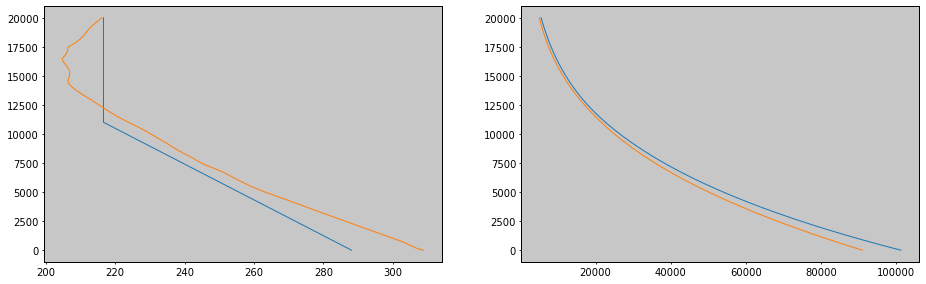

In [8]:
ini_date, end_date='20210711T073000', '20210711T083000'
ymin = 8000
ymax = 9000
# Molecular Attenuated Backscatter
wavelength = 1064
# standard atmosphere profile:
heights = wds['range'].values
Tsa = np.ones(heights.size)*np.nan
Psa = np.ones(heights.size)*np.nan
for i, _height in enumerate(heights):
    sa = helper_functions.standard_atmosphere(_height)
    Psa[i] = sa[0]
    Tsa[i] = sa[1]
pressure_prf_sa = Psa 
temperature_prf_sa = Tsa 
molecular_profiles_sa = lidarQA.molecular_properties(wavelength, pressure_prf_sa, temperature_prf_sa, heights)

#Atmospheric conditions from ECMWF
temperature_prf_ecmwf, pressure_prf_ecmwf = ecmwf.ecmwf_sel(ecmwf_file, ini_date, end_date, 0, wds['range'].values[-1])

#Molecular alfa y beta from ECMWF
molecular_profiles_ecmwf = lidarQA.molecular_properties(wavelength, pressure_prf_ecmwf, temperature_prf_ecmwf, heights)    

fig, ax = plt.subplots(1,2, figsize=[15,5])
ax[0].plot(temperature_prf_sa, heights)
ax[0].plot(temperature_prf_ecmwf, heights)

ax[1].plot(pressure_prf_sa, heights)
ax[1].plot(pressure_prf_ecmwf, heights)

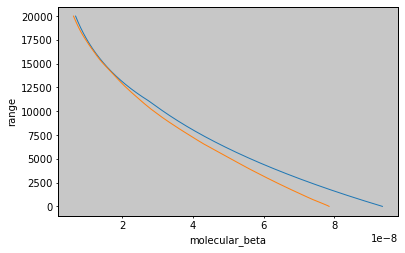

In [7]:
molecular_profiles_sa['molecular_beta'].plot(y='range')
molecular_profiles_ecmwf['molecular_beta'].plot(y='range')